<div style="background-color: lightblue; color: black; padding: 20px; font-weight: bold; font-size: 15px;">Extra Trees</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

RSEED=42

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Read data - Here: Data with 3x rolling shifted average & without store & department dummies</div>

In [9]:
df = pd.read_pickle('data/data_combined_clean_features_11.pkl')

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Train test split</div>

In [10]:
#define train, validation and test dataset
train = df[df['Date'] < "2012-01-06"].reset_index(drop=True)
validation = df[(df['Date'] >= "2012-01-06") & (df['Date'] <= "2012-06-08")].reset_index(drop=True)
test = df[df['Date'] > "2012-06-08"].reset_index(drop=True)
 

#define features and target
X_train = train.drop(columns=['Weekly_Sales', 'Date'])
y_train = train['Weekly_Sales']

X_validation = validation.drop(columns=['Weekly_Sales', 'Date'])
y_validation = validation['Weekly_Sales']

X_test = test.drop(columns=['Weekly_Sales', 'Date'])
y_test = test['Weekly_Sales']  

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Extra Trees</div>

In [11]:
# writing a function to get evaluation metrics for all data sets
def get_metrics(y, y_hat, data_kind):
    '''insert target, predicted target 
    and which kind of dataset as a string'''
    
    mean = y.mean()
    std = y.std()
    mse = mean_squared_error(y, y_hat)
    rmse = np.sqrt(mse)

    print(5*'- - ')
    print(f'Metrics for {data_kind}')
    print('Mean weekly sales:', mean.round(3))
    print('Standard deviation weekly sales:', std.round(3))
    print('MSE:', mse.round(3))
    print('RMSE:', rmse.round(3))
    print(5*'- - ')


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Best model</div>

In [12]:
# instantiate model
model = ExtraTreesRegressor(
    max_depth=25, 
    max_features=0.5, 
    min_samples_leaf=1, 
    n_estimators= 100,
    random_state=42)

# fit the model with train data 
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_validation = model.predict(X_validation)
y_pred_test = model.predict(X_test)

In [13]:
get_metrics(y_train, y_pred_train, 'Train')
get_metrics(y_validation, y_pred_validation, 'Validation')
get_metrics(y_test, y_pred_test, 'Test')

- - - - - - - - - - 
Metrics for Train
Mean weekly sales: 17639.364
Standard deviation weekly sales: 23534.607
MSE: 1190150.665
RMSE: 1090.94
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Validation
Mean weekly sales: 17342.499
Standard deviation weekly sales: 22893.483
MSE: 11017994.196
RMSE: 3319.336
- - - - - - - - - - 
- - - - - - - - - - 
Metrics for Test
Mean weekly sales: 17402.01
Standard deviation weekly sales: 22530.901
MSE: 7087163.445
RMSE: 2662.173
- - - - - - - - - - 


<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Adding predicted values to train, validation and test dataframe</div>

In [14]:
train['Predicted_Sales'] = y_pred_train
validation['Predicted_Sales'] = y_pred_validation
test['Predicted_Sales'] = y_pred_test

<div style="background-color: lightblue; color: black; padding: 10px; font-weight: bold; font-size: 15px;">Plotting actual target versus predicted target </div>

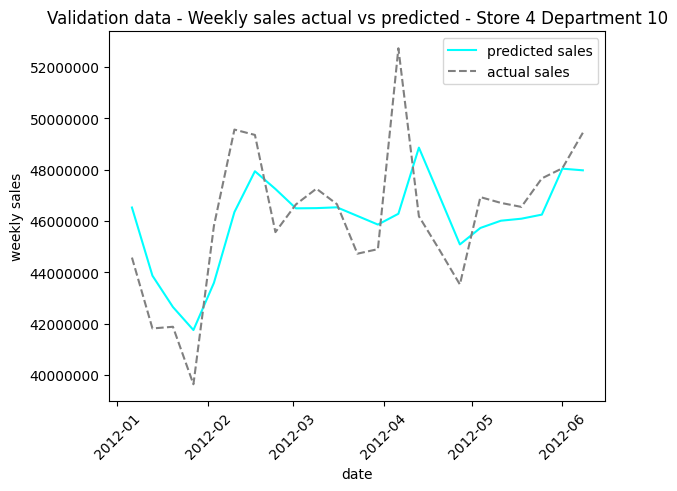

In [15]:
sns.lineplot(data=validation.query('Store==4 and Dept==10'), 
             x='Date', y=validation.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation.query('Store==4 and Dept==10'), 
             x='Date', y=validation.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None, 
             color='grey', linestyle='--')
plt.title('Validation data - Weekly sales actual vs predicted - Store 4 Department 10')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

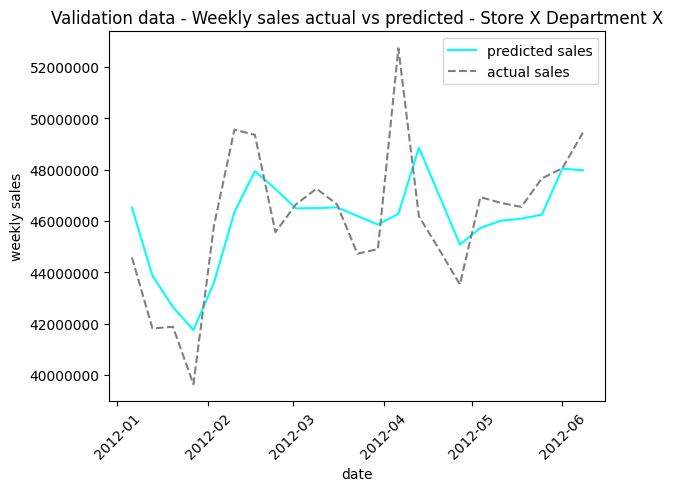

In [16]:
sns.lineplot(data=validation.query('Store==4 and Dept==10'), 
             x='Date', y=validation.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation.query('Store==4 and Dept==10'), 
             x='Date', y=validation.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None, 
             color='grey', linestyle='--')
plt.title('Validation data - Weekly sales actual vs predicted - Store X Department X')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

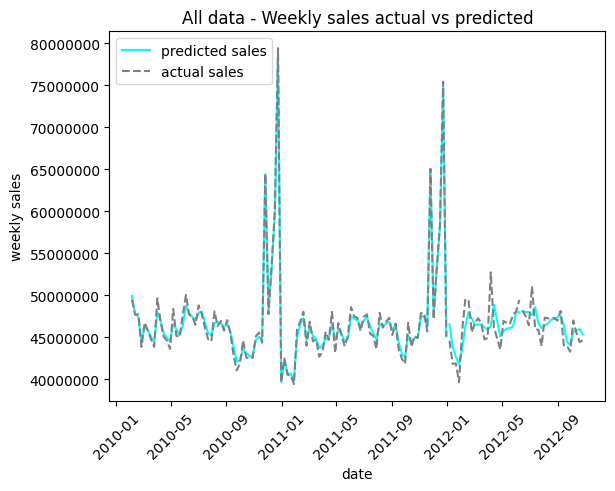

In [17]:
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=train, x='Date', y=train.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', color='grey', 
             linestyle='--', errorbar=None)
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             errorbar=None, color='cyan')
sns.lineplot(data=validation, x='Date', y=validation.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             errorbar=None, color='grey', linestyle='--')
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             errorbar=None, color='cyan')
sns.lineplot(data=test, x='Date', y=test.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             errorbar=None, color='grey', linestyle='--')
plt.title('All data - Weekly sales actual vs predicted')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain', axis='y');

In [18]:
validation_and_test = pd.concat([validation, test], axis=0)

In [19]:
validation_and_test.Date.nunique()

43

In [20]:
get_metrics(validation_and_test.Weekly_Sales, 
            validation_and_test.Predicted_Sales, 'Validation and Test')



- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 17370.179
Standard deviation weekly sales: 22725.48
MSE: 9189700.823
RMSE: 3031.452
- - - - - - - - - - 


In [21]:
validation_and_test.Weekly_Sales.sum()

1986801036.38

In [22]:
for store in validation_and_test.Store.unique():
    print(f'Values for store {store}')
    store_data = validation_and_test[validation_and_test['Store'] == store]
    
    get_metrics(store_data['Weekly_Sales'], store_data['Predicted_Sales'], 'Validation and Test')


Values for store 1
- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 23061.685
Standard deviation weekly sales: 29081.053
MSE: 11013514.618
RMSE: 3318.662
- - - - - - - - - - 
Values for store 2
- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 28182.308
Standard deviation weekly sales: 33366.509
MSE: 12824382.595
RMSE: 3581.115
- - - - - - - - - - 
Values for store 3
- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 7192.85
Standard deviation weekly sales: 12701.431
MSE: 3174108.837
RMSE: 1781.603
- - - - - - - - - - 
Values for store 4
- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 31573.604
Standard deviation weekly sales: 35710.966
MSE: 14058202.758
RMSE: 3749.427
- - - - - - - - - - 
Values for store 5
- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 5737.742
Standard deviation weekly sales: 8820.653
MSE: 2047795.654
RMSE: 1431.012
- - - - - - - - - - 
Values for store

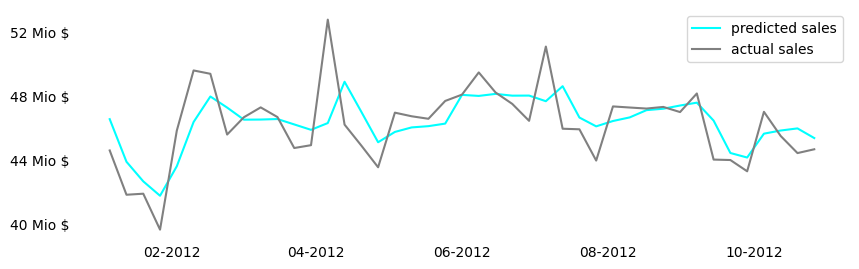

In [23]:
plt.figure(figsize=(10, 3))

#plotting lines for predicted and actual sales
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation_and_test, x='Date', 
             y=validation_and_test.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', color='grey', 
             errorbar=None) #linestyle='--', 

# y ticks formatting
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x / 1e6:.0f} Mio $')
ytick_positions = [plt.gca().get_yticks()[1], plt.gca().get_yticks()[3], 
                   plt.gca().get_yticks()[5], plt.gca().get_yticks()[7]]

plt.gca().set_yticks(ytick_positions)
plt.gca().tick_params(axis='y', which='both', length=0)

# x ticks formatting
from matplotlib.dates import DateFormatter
date_format = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)

xtick_positions = [plt.gca().get_xticks()[1], plt.gca().get_xticks()[3], 
                   plt.gca().get_xticks()[5], plt.gca().get_xticks()[7],
                   plt.gca().get_xticks()[9]]

plt.gca().set_xticks(xtick_positions)
plt.gca().tick_params(axis='x', which='both', length=0)

sns.despine(top=True, right=True, left=True, bottom=True)
#plt.title('Validation and test data - Weekly sales actual vs predicted')
plt.ylabel('')#weekly sales
plt.xlabel('')#Date
#plt.xticks(rotation=45)
plt.legend();
#plt.ticklabel_format(style='plain', axis='y')

In [24]:
# 

plt.figure(figsize=(10, 4))

sns.lineplot(x = df_store_10['Date'], y = df_store_10['Weekly_Sales_Store'], 
              linewidth=2.5, color='mediumaquamarine', label='Store 10')

sns.lineplot(x = df_store_33['Date'], y = df_store_33['Weekly_Sales_Store'], 
              linewidth=2.5, color='darkcyan', label='Store 33')

sns.despine(top=True, right=True, left=True, bottom=True)

# y ticks as Mio and not all of them
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x / 1e6:.0f} Mio')

# Festlegen der y-Achsenticks
ytick_positions = [0, 1e6, 2e6, 3e6, 4e6]
plt.yticks(ytick_positions)

plt.gca().tick_params(axis='y', which='both', length=0)

# x ticks as Year and only 1st per year
from matplotlib.dates import DateFormatter
date_format = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_format)

xtick_positions = [plt.gca().get_xticks()[1], plt.gca().get_xticks()[4], plt.gca().get_xticks()[7]]
plt.gca().set_xticks(xtick_positions)
plt.gca().tick_params(axis='x', which='both', length=0)

plt.ylabel('')
plt.xlabel('')
plt.title('', pad=30); #'Store 10 an 33 weekly sales on store level'


NameError: name 'df_store_10' is not defined

<Figure size 1000x400 with 0 Axes>

In [25]:
validation_and_test_one_store_one_dept = validation_and_test.query('Store==4')#and Dept==10

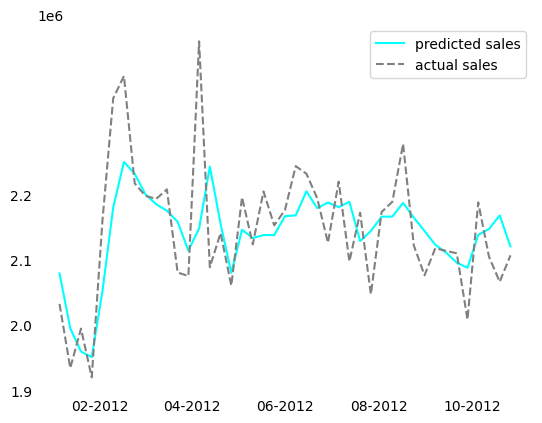

In [26]:
sns.lineplot(data=validation_and_test_one_store_one_dept, 
             x='Date', y=validation_and_test_one_store_one_dept.groupby(['Date'])['Predicted_Sales'].transform('sum'), 
             label='predicted sales', errorbar=None,
             color='cyan')
sns.lineplot(data=validation_and_test_one_store_one_dept, 
             x='Date', y=validation_and_test_one_store_one_dept.groupby(['Date'])['Weekly_Sales'].transform('sum'), 
             label ='actual sales', errorbar=None, 
             color='grey', linestyle='--')

sns.despine(top=True, right=True, left=True, bottom=True)

# y ticks formatting
#plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x / 1e6:.0f} Mio $')
ytick_positions = [plt.gca().get_yticks()[1], plt.gca().get_yticks()[2], 
                   plt.gca().get_yticks()[3], plt.gca().get_yticks()[4]]

plt.gca().set_yticks(ytick_positions)
plt.gca().tick_params(axis='y', which='both', length=0)

# x ticks formatting
from matplotlib.dates import DateFormatter
date_format = DateFormatter("%m-%Y")
plt.gca().xaxis.set_major_formatter(date_format)

xtick_positions = [plt.gca().get_xticks()[1], plt.gca().get_xticks()[3], 
                   plt.gca().get_xticks()[5], plt.gca().get_xticks()[7],
                   plt.gca().get_xticks()[9]]

plt.gca().set_xticks(xtick_positions)
plt.gca().tick_params(axis='x', which='both', length=0)

plt.title('')#Validation data - Weekly sales actual vs predicted - Store X Department X'
plt.ylabel('')#weekly sales
plt.xlabel('')#date
#plt.xticks(rotation=45)
plt.legend()
#plt.ticklabel_format(style='plain', axis='y');

In [27]:
validation_and_test_store_4.Weekly_Sales.sum()

NameError: name 'validation_and_test_store_4' is not defined

In [ ]:
validation_and_test_store_4.shape

(2924, 27)

In [28]:
validation_and_test.Weekly_Sales.sum()

1986801036.38

In [29]:
observations_count = validation_and_test.shape[0]
observations_count

114380

In [30]:
get_metrics(validation_and_test.Weekly_Sales, 
            validation_and_test.Predicted_Sales, 'Validation and Test')

- - - - - - - - - - 
Metrics for Validation and Test
Mean weekly sales: 17370.179
Standard deviation weekly sales: 22725.48
MSE: 9189700.823
RMSE: 3031.452
- - - - - - - - - - 


In [31]:
Error_total_best_model = observations_count*3031.45
Error_total_best_model

346737251.0

### Top and bottom store plot

In [32]:
df = pd.read_pickle('data/data_combined_clean_2.pkl')

In [33]:
#creating a new dataframe with aggregations
df2 = df.query('Year == 2010 or Year == 2011')
df2 = df2.groupby(['Store', 'Year'])['Weekly_Sales'].sum().reset_index()
df2.rename(columns={'Weekly_Sales': 'Year_Sales'}, inplace=True)
df2['Total_Sales'] = df2.groupby(['Store'])['Year_Sales'].transform('sum')
df2

,Store,Year,Year_Sales,Total_Sales
0,1,2010,72097154.58,1.508875e+08
1,1,2011,78790304.60,1.508875e+08
2,2,2010,94652618.13,1.926166e+08
3,2,2011,97964019.83,1.926166e+08
4,3,2010,18544473.66,3.918244e+07
...,...,...,...,...
85,43,2011,31970402.89,6.342352e+07
86,44,2010,13557529.44,2.900376e+07
87,44,2011,15446229.59,2.900376e+07
88,45,2010,37990752.81,7.839091e+07


In [34]:
# creating a dataframe only with top and bottom stores
df_top_bottom = df2.query('Store==4 or Store==14 or Store==20 or Store ==5 or Store ==33 or Store ==44')
df_top_bottom

,Store,Year,Year_Sales,Total_Sales
6,4,2010,9.495042e+07,2.052165e+08
7,4,2011,1.102661e+08,2.052165e+08
8,5,2010,1.466009e+07,3.095428e+07
9,5,2011,1.629419e+07,3.095428e+07
26,14,2010,1.047384e+08,2.100345e+08
27,14,2011,1.052962e+08,2.100345e+08
38,20,2010,1.007286e+08,2.095633e+08
39,20,2011,1.088347e+08,2.095633e+08
64,33,2010,1.272909e+07,2.563441e+07
65,33,2011,1.290532e+07,2.563441e+07


In [35]:
top_performers = df2.groupby('Store')['Year_Sales'].sum().nlargest(3).index
bottom_performers = df2.groupby('Store')['Year_Sales'].sum().nsmallest(3).index

print('Top-performer 2010 and 2011:',top_performers)
print('Bottom-performer 2010 and 2011:',bottom_performers)

Top-performer 2010 and 2011: Index([14, 20, 4], dtype='int64', name='Store')
Bottom-performer 2010 and 2011: Index([33, 44, 5], dtype='int64', name='Store')


#### plotting top and bottom departments final version - sorted

In [38]:
# here for first create a sorted dataframe

df_top_bottom_sorted = df_top_bottom.sort_values(by='Total_Sales', ascending=False)

In [39]:
# now convert Store into string

df_top_bottom_sorted['Store'] = df_top_bottom_sorted['Store'].astype('str') 

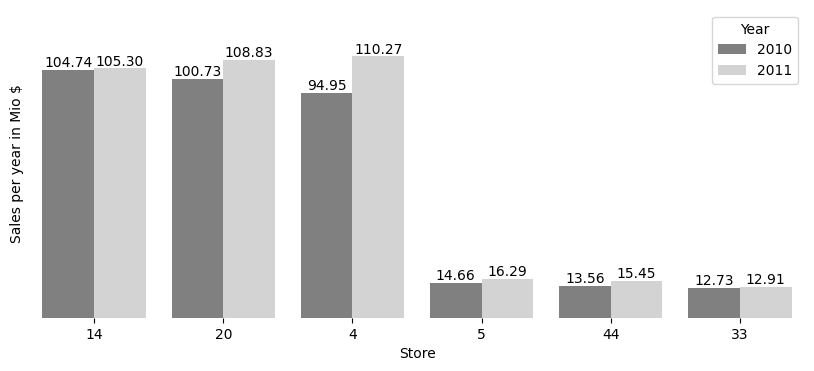

In [40]:
my_pal=['grey', 'lightgrey']

plt.figure(figsize=(10, 4))

ax = sns.barplot(data=df_top_bottom_sorted, x=df_top_bottom_sorted['Store'], y='Year_Sales', hue='Year', palette=my_pal)

sns.despine(top=True, right=True, left=True, bottom=True)

# # y ticks as Mio and only f1st, 5th and 10th
#plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x / 1e6:.0f} Mio $')
# ytick_positions = [plt.gca().get_yticks()[0], plt.gca().get_yticks()[3], plt.gca().get_yticks()[6]]
plt.gca().set_yticks([])
# plt.gca().tick_params(axis='y', which='both', length=0)

#def function for format formatting of bar labels
def format_millions(x):
   return f'{x / 1e6:.2f}' # change here decimals

#add labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt=format_millions, label_type='edge')

plt.title('') #Total sales by store 
plt.xlabel('Store')
plt.ylabel('Sales per year in Mio $')#Sales per year
plt.legend(title='Year')
#plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 130000000);

## Department

In [41]:
#creating a new dataframe with aggregations
df3 = df.query('Year == 2010 or Year == 2011')
df3 = df3.groupby(['Dept', 'Year'])['Weekly_Sales'].sum().reset_index()
df3.rename(columns={'Weekly_Sales': 'Year_Sales'}, inplace=True)
df3['Total_Sales'] = df3.groupby(['Dept'])['Year_Sales'].transform('sum')

df3

,Dept,Year,Year_Sales,Total_Sales
0,1,2010,4.284353e+07,8.819285e+07
1,1,2011,4.534931e+07,8.819285e+07
2,2,2010,9.405293e+07,1.955582e+08
3,2,2011,1.015053e+08,1.955582e+08
4,3,2010,2.509114e+07,5.210935e+07
...,...,...,...,...
139,96,2011,2.504160e+07,4.778284e+07
140,97,2010,2.924898e+07,6.159706e+07
141,97,2011,3.234808e+07,6.159706e+07
142,98,2010,1.365853e+07,2.808736e+07


In [43]:
top_performers_dept = df3.groupby('Dept')['Year_Sales'].sum().nlargest(3).index
bottom_performers_dept = df3.groupby('Dept')['Year_Sales'].sum().nsmallest(3).index

print('Top-performer 2010 and 2011:',top_performers_dept)
print('Bottom-performer 2010 and 2011:',bottom_performers_dept)
top_performers_dept

Top-performer 2010 and 2011: Index([92, 95, 38], dtype='int64', name='Dept')
Bottom-performer 2010 and 2011: Index([54, 48, 60], dtype='int64', name='Dept')


Index([92, 95, 38], dtype='int64', name='Dept')

In [42]:
top_performers_dept = df3.groupby('Dept')['Year_Sales'].nlargest(3).index
bottom_performers_dept = df3.groupby('Dept')['Year_Sales'].nsmallest(3).index

top_performers_dept = df3.groupby('Dept')['Year_Sales'].sum().nlargest(3).index
bottom_performers_dept = df3.groupby('Dept')['Year_Sales'].sum().nsmallest(3).index

print('Top-performer 2010 and 2011:',top_performers_dept)
print('Bottom-performer 2010 and 2011:',bottom_performers_dept)

Top-performer 2010 and 2011: Index([92, 95, 38], dtype='int64', name='Dept')
Bottom-performer 2010 and 2011: Index([54, 48, 60], dtype='int64', name='Dept')


In [44]:
#creating a dataframe with top and bottom departments

df_top_bottom_dept = df3.query('Dept==38 or Dept==48 or Dept==54 or Dept==60 or Dept==92 or Dept==95')
df_top_bottom_dept

,Dept,Year,Year_Sales,Total_Sales
70,38,2010,1.288553e+08,2.721166e+08
71,38,2011,1.432613e+08,2.721166e+08
82,48,2010,9.450330e+04,1.980512e+05
83,48,2011,1.035479e+05,1.980512e+05
90,54,2010,2.590467e+04,3.168557e+04
91,54,2011,5.780900e+03,3.168557e+04
100,60,2010,5.457060e+05,1.120643e+06
101,60,2011,5.749371e+05,1.120643e+06
130,92,2010,1.558376e+08,3.323139e+08
131,92,2011,1.764763e+08,3.323139e+08


In [45]:
# sort dataframe in descending order

df_top_bottom_dept_sorted = df_top_bottom_dept.sort_values(by='Total_Sales', ascending=False)
df_top_bottom_dept_sorted

,Dept,Year,Year_Sales,Total_Sales
130,92,2010,1.558376e+08,3.323139e+08
131,92,2011,1.764763e+08,3.323139e+08
136,95,2010,1.498584e+08,3.114284e+08
137,95,2011,1.615699e+08,3.114284e+08
70,38,2010,1.288553e+08,2.721166e+08
71,38,2011,1.432613e+08,2.721166e+08
100,60,2010,5.457060e+05,1.120643e+06
101,60,2011,5.749371e+05,1.120643e+06
82,48,2010,9.450330e+04,1.980512e+05
83,48,2011,1.035479e+05,1.980512e+05


In [46]:
#convert Dept into a string for plotting in descending order

df_top_bottom_dept_sorted['Dept'] = df_top_bottom_dept_sorted['Dept'].astype('str')
df_top_bottom_dept_sorted

,Dept,Year,Year_Sales,Total_Sales
130,92,2010,1.558376e+08,3.323139e+08
131,92,2011,1.764763e+08,3.323139e+08
136,95,2010,1.498584e+08,3.114284e+08
137,95,2011,1.615699e+08,3.114284e+08
70,38,2010,1.288553e+08,2.721166e+08
71,38,2011,1.432613e+08,2.721166e+08
100,60,2010,5.457060e+05,1.120643e+06
101,60,2011,5.749371e+05,1.120643e+06
82,48,2010,9.450330e+04,1.980512e+05
83,48,2011,1.035479e+05,1.980512e+05


#### plotting top and bottom departments final version - sorted

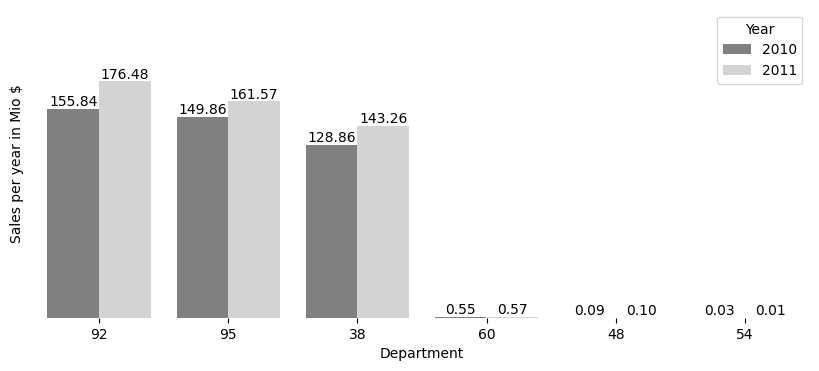

In [47]:
my_pal=['grey', 'lightgrey']

plt.figure(figsize=(10, 4))

ax = sns.barplot(x='Dept', y='Year_Sales', hue='Year', data=df_top_bottom_dept_sorted, palette=my_pal) #order=df_top_bottom_dept.sort_values('Year_Sales').Dept) #order=df_top_bottom_dept.sort_values('Total_Sales').Dept)
#ax = sns.barplot(data=df_top_bottom_dept, x='Dept', y='Year_Sales', hue='Year', palette=my_pal,  order=df_top_bottom_dept.sort_values('Total_Sales').Dept)

sns.despine(top=True, right=True, left=True, bottom=True)

# annotate bars
'''01_data_exploration.ipynbfor i in ax.containers:
    ax.bar_label(i,); '''

#def function for format formatting of bar labels
def format_millions(x):
   return f'{x / 1e6:.2f}'

#add labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt=format_millions, label_type='edge')


# y ticks as Mio and only f1st, 5th and 10th
# plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x / 1e6:.2f} Mio $')
# ytick_positions = [plt.gca().get_yticks()[0], plt.gca().get_yticks()[3], plt.gca().get_yticks()[6]]
# plt.gca().set_yticks(ytick_positions)
# plt.gca().tick_params(axis='y', which='both', length=0)

# y ticks delete
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='y', which='both', length=0)

plt.title('') #Total sales by store 
plt.xlabel('Department')
plt.ylabel('Sales per year in Mio $')
plt.legend(title='Year', loc='upper right')
#plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 230000000);

## Store size

In [52]:
# giving the bins of Store size labels out of the bin_edges

bin_labels = ["35k-41k", "42k-112k", "113k-126k", "127k-155k", "156k-202k", "202k-203k", "203k-219k"] 

#now create a new column bins with the new created labels and print out the edges (first without labels, then creating labels, then with labels)
df['bins'], bin_edges = pd.qcut(df['Size'], q=7, labels=bin_labels, retbins=True)

#df['bins'], bin_edges = pd.qcut(df['Size'], q=7, labels=False, retbins=True)

# Display the DataFrame with bins and edges
print(df)

# Print the bin edges
print("Bin Edges:", bin_edges)

        Store  Dept       Date  Weekly_Sales  IsHoliday  Fuel_Price   
0           1     1 2010-02-05      24924.50      False       2.572  \
1           1     1 2010-02-12      46039.49       True       2.548   
2           1     1 2010-02-19      41595.55      False       2.514   
3           1     1 2010-02-26      19403.54      False       2.561   
4           1     1 2010-03-05      21827.90      False       2.625   
...       ...   ...        ...           ...        ...         ...   
421430     45    97 2012-09-28       6269.73      False       3.997   
421431     45    97 2012-10-05       6573.18      False       3.985   
421432     45    97 2012-10-12       6463.32      False       4.000   
421433     45    97 2012-10-19       5575.90      False       3.969   
421434     45    97 2012-10-26       6817.48      False       3.882   

               CPI  Unemployment Type    Size  Year  Temp_Celsius       bins  
0       211.096358         8.106    A  151315  2010          5.73  1

#### plotting Weekly Sales by Store Size with bins - final version

In [53]:
df_size_grouped = df.groupby('bins')['Weekly_Sales'].mean()
df_size_grouped

bins
35k-41k       9728.993017
42k-112k     12279.419445
113k-126k    16995.914105
127k-155k    15161.200703
156k-202k    21617.925317
202k-203k    22332.627682
203k-219k    25200.362504
Name: Weekly_Sales, dtype: float64

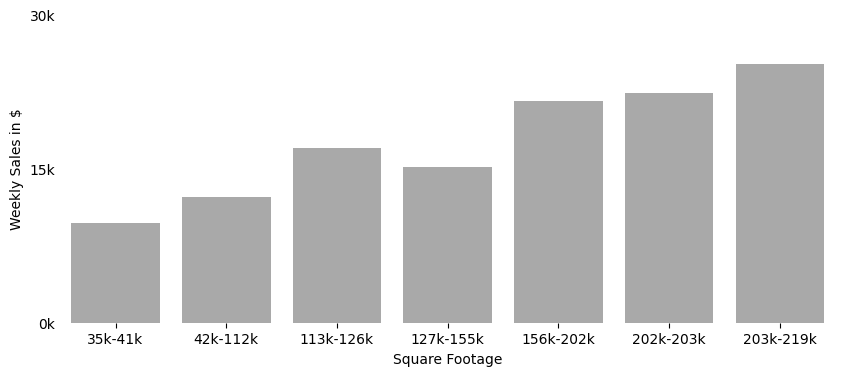

In [60]:
plt.figure(figsize=(10, 4))

ax = sns.barplot(data= df, x='bins', y='Weekly_Sales', color='darkgrey', errorbar=None)

#def function for format formatting of bar labels
def format_millions(x):
    return f'{x / 1e6:.0f}'


sns.despine(top=True, right=True, left=True, bottom=True)
#sns.despine(top=True, right=True, left=True, bottom=True)

#y ticks as Mio and only f1st, 5th and 10th
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x / 1000:.0f}k')
ytick_positions = [plt.gca().get_yticks()[0], plt.gca().get_yticks()[3], plt.gca().get_yticks()[6]]
plt.gca().set_yticks(ytick_positions)
plt.gca().tick_params(axis='y', which='both', length=0)



#plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='y', which='both', length=0)


plt.ylabel('Weekly Sales in $')
plt.xlabel('Square Footage')
#plt.title('', pad=30);
plt.title('', pad=30);

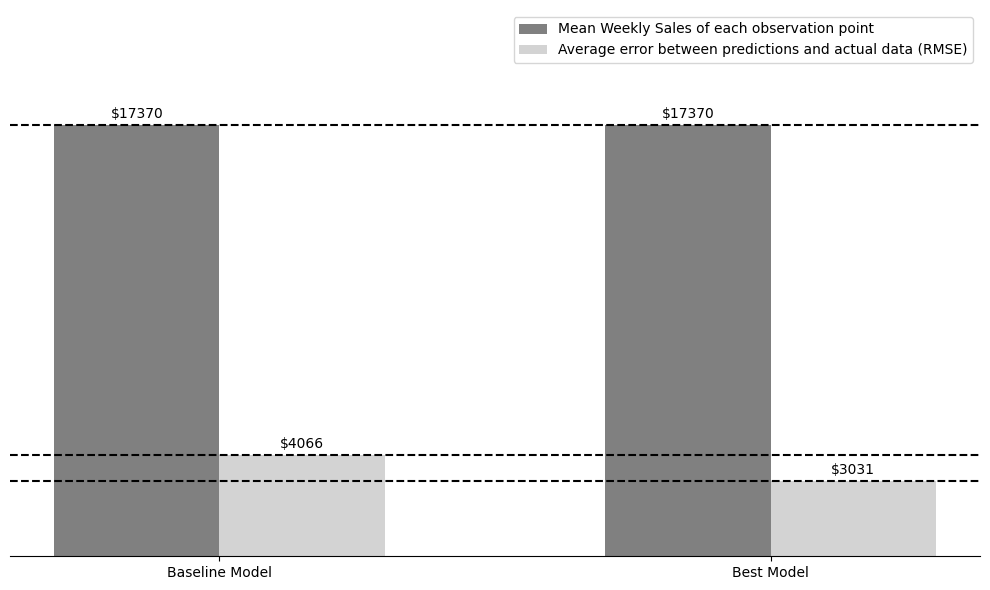

In [2]:
# Data
my_data = {
    "Category": ['Baseline Model', 'Best Model'],
    "Mean weekly sales": [17370, 17370],
    "RMSE": [4066, 3031]
}

my_df = pd.DataFrame(my_data)

# Set the width of each bar
bar_width = 0.3

# Create an array for the x-axis positions
x = np.arange(len(my_df['Category']))

# Create the figure and axes for the subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for "Mean weekly sales" and "RMSE" for Baseline Model
baseline_sales = ax.bar(x - bar_width/2, my_df['Mean weekly sales'], bar_width, label='Mean Weekly Sales of each observation point', color='grey')
baseline_rmse = ax.bar(x + bar_width/2, my_df['RMSE'], bar_width, label='Average error between predictions and actual data (RMSE)', color='lightgray')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(my_df['Category'])

# Remove the y-axis
ax.get_yaxis().set_visible(False)

# Set y-axis label and title
ax.set_ylabel("Amount ($)")
ax.set_title("")

# Add data labels on top of the bars
for bar in baseline_sales + baseline_rmse:
    height = bar.get_height()
    ax.annotate(f"${height}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')


plt.axhline(17370, color='black', linestyle='--')
plt.axhline(3031, color='black', linestyle='--')
plt.axhline(4066, color='black', linestyle='--')

# Display the legend
#ax.legend(location = "top_right")
ax.legend(title="", loc="upper right")
# Adjust the layout
plt.tight_layout()
plt.ylim(0, 22000)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Show the plot
plt.show()